# Bike store sales analysis
#### Bike store sales in Europe dataset avalable at: https://www.kaggle.com/code/sadiqshah/bike-store-sales-in-europe/data

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv('datasets/Bike_Sales.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

## Data Cleaning

In [6]:
# changeing M to Male and F to female
df['Customer_Gender'] = df['Customer_Gender'].replace('M', 'Male')
df['Customer_Gender'] = df['Customer_Gender'].replace('F', 'Female')

In [7]:
# removing the column Day and Date
df = df.drop('Day', axis=1)
df = df.drop('Date', axis=1)

In [8]:
df.head()

,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,November,2013,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,November,2015,19,Youth (<25),Male,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,March,2014,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,March,2016,49,Adults (35-64),Male,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,May,2014,47,Adults (35-64),Female,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


## Data Analysis

#### what is the age distribution of the customers?

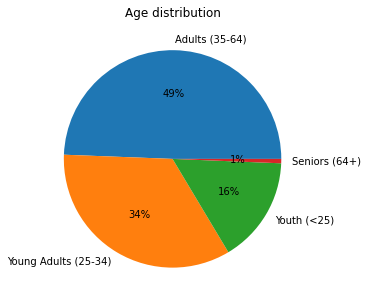

In [11]:
df['Age_Group'].value_counts().plot(kind="pie",autopct="%.0f%%", title="Age distribution",ylabel="", figsize=(10,5));

**Answer**: highest number of customers were Adults between the ages of 35 to 64

#### What is the most profitable year?

<AxesSubplot:title={'center':'Profitable year'}, ylabel='Year'>

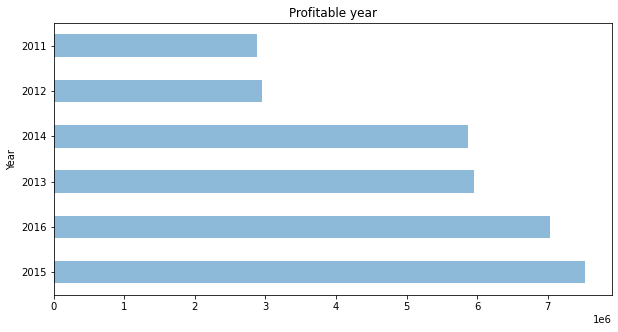

In [24]:
df.groupby('Year').sum()['Profit'].sort_values(ascending=False).plot(kind="barh", title="Profitable year",xlabel="Year", figsize=(10,5), alpha=0.5)

**Answer**: 2015 is the was Profitable year

#### what is the most profitable month?

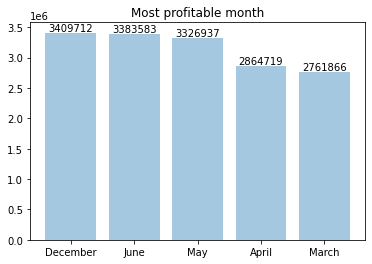

In [23]:
pMonth = df.groupby('Month').sum()['Profit'].sort_values(ascending=False).head()
plt.bar(pMonth.index, pMonth, alpha=0.4)
plt.title('Most profitable month')
for i in range(len(pMonth)):
    plt.text(i, pMonth[i], pMonth[i], ha='center', va='bottom')

**Answer**: Chart shows that the highest profitable month is December, might be becuse of Christmas

#### Which Gender has the most orders?

<AxesSubplot:title={'center':'most ordered gender'}>

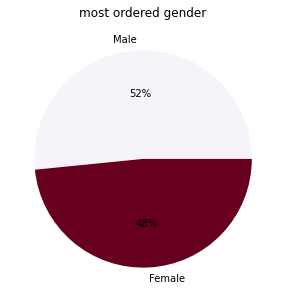

In [26]:
df['Customer_Gender'].value_counts().plot(kind="pie",autopct="%.0f%%",title="most ordered gender",ylabel="", figsize=(10,5), cmap="PuRd")

**Answer**: 52% of orders were made by Men

#### Which country/state generates the highest revenue?

<AxesSubplot:title={'center':'highest revenue country'}>

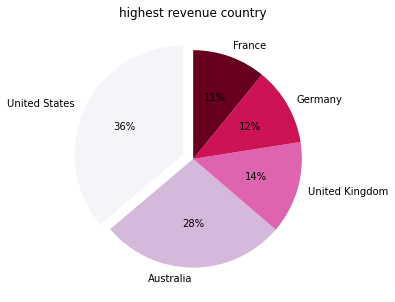

In [27]:
explode = [0.1, 0,0,0,0]
df.groupby('Country').sum()['Revenue'].sort_values(ascending=False).head(5).plot(kind="pie", autopct="%.0f%%",title="highest revenue country",ylabel="", figsize=(10,5), cmap="PuRd", startangle=90, explode=explode)

**Answer**: Highest revenue country is the United states

<AxesSubplot:title={'center':'highest revenue state'}>

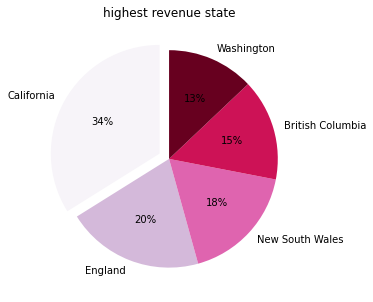

In [29]:
explode = [0.1, 0,0,0,0]
df.groupby('State').sum()['Revenue'].sort_values(ascending=False).head(5).plot(kind="pie", autopct="%.0f%%",title="highest revenue state",ylabel="", figsize=(10,5), cmap="PuRd", startangle=90, explode=explode)

**Answer**: Highest revenue State is the california

#### Is there any correlation between the customer’s age and revenue?

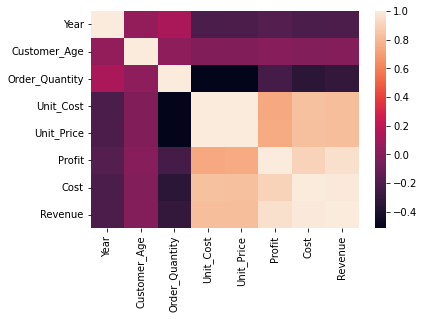

In [30]:
corrr = df.corr()
sns.heatmap(corrr)
plt.show()

**Answer**: No relatationship between Customer’s age and revenue. but there is relationship between the unit cost, price, profit and revenue.

#### Which category/subcategory generates the most profit?

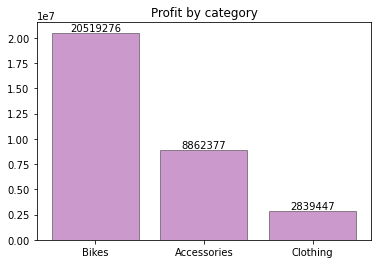

In [31]:
pr = df.groupby('Product_Category').sum()['Profit'].sort_values(ascending=False)
plt.bar(pr.index, pr, fc='purple', ec='black', alpha=0.4)
plt.title('Profit by category')
for i in range(len(pr)):
    plt.text(i, pr[i], pr[i], ha='center', va='bottom')

**Answer**: Most profitable category is bikes

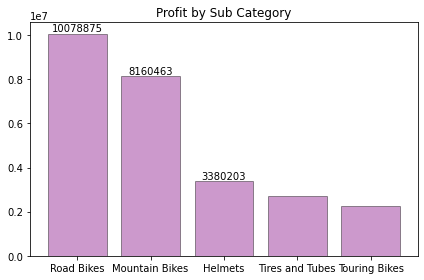

In [32]:
pr2 = df.groupby('Sub_Category').sum()['Profit'].sort_values(ascending=False).head(5)
plt.bar(pr2.index, pr2, fc='purple', ec='black', alpha=0.4)
plt.title('Profit by Sub Category')
for i in range(len(pr)):
    plt.text(i, pr2[i], pr2[i], ha='center', va='bottom')
plt.tight_layout()

**Answer**: Most profitable subcategory is Road bikes